# Modelo de Regresión lineal

In [16]:
import pandas as pd 
import numpy as np
import folium
import math
import time
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
import pandas as pd 
import numpy as np
import folium
import math
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
dataframe = pd.read_csv('/home/inma/HH_intro_git_ds/practicaFundamentosAD/dataframe-ruben2.csv')

import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot
def quartile_skew(x):
  q = x.quantile([.25, .50, .75]) 
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])


def mostrar_analisis_var_cuantitativas(data):
    #calcular coeficiente de variacion
 datos_variable=pd.DataFrame([{"coeficiente de Variacion":(data.std()/data.mean())*100,\
                 "rango de la variable":data.max() - data.min(),
                 "rango intercuartilico":data.quantile(0.75) - data.quantile(0.25),
                 "coeficiente de asimetria":quartile_skew(data),
                 "Min":data.min(),
                 "Max":data.max(),
                 "Mean":data.mean()}])
 return(datos_variable)

def mostrar_graf_variables_continuas(df_data,column):
    sb.set_theme(style="whitegrid")
    fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
    sb.histplot(data=df_data,x=column,ax=ax1)
    sb.boxplot(data=df_data,x=column,ax=ax2)
    sb.displot(data=df_data, x=column,kind="kde",rug=True)
    return plot.show()
def mostrar_graf_variables_discretas(df_data,column):
    sb.set_theme(style="whitegrid")
    fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
    sb.boxplot(data=df_data,x=column,ax=ax1)
    sb.countplot(data=df_data,x=column,ax=ax2)
    plot.show()
dataframe_old = pd.read_csv('/home/inma/HH_intro_git_ds/Melbourne_housing_FULL.csv')
import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings

def quartile_skew(x):
  q = x.quantile([.25, .50, .75]) 
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])
#dataframe['Price']=dataframe_old['Price']

duplicateRowsDF=pd.DataFrame()
duplicateRowsDF = dataframe[dataframe.duplicated(['Suburb', 'Address','Postcode','CouncilArea',],keep=False)]
duplicateRowsDF=duplicateRowsDF.drop_duplicates(subset=['Address','Price','Date'])
duplicateRowsDF=duplicateRowsDF.dropna(subset=['Price'])
dataframe=dataframe.drop_duplicates(subset=['Address','Suburb'], keep=False, ignore_index=True)
dataframe.append(duplicateRowsDF)
dataframe=dataframe.dropna(subset=['Price'])
dataframe=dataframe.reset_index(drop=True)



#dataframe['Price']=dataframe['Price'].replace(0, 1)
print(dataframe)
print(dataframe_old.dtypes)
dataframe['Rooms']=np.sqrt(dataframe['Rooms'])
dataframe['Distance']=np.sqrt(dataframe['Distance'])


dataframe['Longtitude']=dataframe['Longtitude'].replace(0, 1)
dataframe['Distance']=dataframe['Distance'].replace(0, 1)
dataframe['Landsize']=dataframe['Landsize'].replace(0, 1)
dataframe=dataframe[dataframe['Landsize']>0]
dataframe['Longtitude']=dataframe['Longtitude'].replace(0, 1)

dataframe_filtered=pd.DataFrame(dataframe[dataframe["Distance"].notnull()])
print(dataframe_filtered)
dataframe_filtered=dataframe_filtered[dataframe_filtered["Landsize"].notnull()]
dataframe_filtered=dataframe_filtered[dataframe_filtered["Price"].notnull()]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Price']!=np.nan]
dataframe_filtered['Price']=np.log(dataframe_filtered['Price'].astype(np.int64))# logaritmo neperiano del precio 
dataframe_filtered=dataframe_filtered[dataframe_filtered['Distancia_NEW']<40]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Rooms']<10]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Bathroom']<5]
dataframe_filtered['Landsize']=np.log(dataframe_filtered['Landsize'])
dataframe_filtered['Longtitude']=np.log(dataframe_filtered['Longtitude'])
dataframe_filtered['Propertycount']=np.log(dataframe_filtered['Propertycount'])
dataframe_filtered['Propertycount']=np.log(dataframe_filtered['Propertycount'])
dataframe_filtered=dataframe_filtered[dataframe_filtered['Distance']!=np.nan]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Landsize']!=np.nan]
dataframe_filtered=dataframe_filtered[dataframe_filtered['Longtitude']!=np.nan]
dataframe_filtered['BathAndRooms']=(dataframe_filtered["Rooms"]+dataframe_filtered["Bathroom"])/np.sqrt(dataframe_filtered['Distancia_NEW'])
dataframe_filtered.describe()
dataframe_filtered['Distancia_NEW']=np.sqrt(dataframe_filtered['Distancia_NEW'])
dataframe_filtered['Car_r_bt']=dataframe_filtered['Car']*dataframe_filtered['Rooms']*dataframe_filtered['Bathroom']
dataframe_filtered['BathAndRooms']

       Unnamed: 0      Suburb           Address  Rooms Type      Price Method  \
0               1  Abbotsford      85 Turner St      2    h  1480000.0      S   
1               2  Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2               4  Abbotsford      5 Charles St      3    h  1465000.0     SP   
3               5  Abbotsford  40 Federation La      3    h   850000.0     PI   
4               6  Abbotsford       55a Park St      4    h  1600000.0     VB   
...           ...         ...               ...    ...  ...        ...    ...   
20250       34851  Yarraville     78 Bayview Rd      3    h  1101000.0      S   
20251       34852  Yarraville       13 Burns St      4    h  1480000.0     PI   
20252       34853  Yarraville     29A Murray St      2    h   888000.0     SP   
20253       34854  Yarraville    147A Severn St      2    t   705000.0      S   
20254       34856  Yarraville  3 Tarrengower St      2    h  1020000.0     PI   

       SellerG        Date 

0        1.007289
1        1.048823
2        1.648509
3        1.515155
4        1.301475
           ...   
20250    0.739971
20251    0.810947
20252    0.938173
20253    0.646959
20254    0.676658
Name: BathAndRooms, Length: 19963, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.055e+04
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:22:34   Log-Likelihood:                -5151.4
No. Observations:               15970   AIC:                         1.031e+04
Df Residuals:                   15967   BIC:                         1.033e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.6407      0.017    723.331

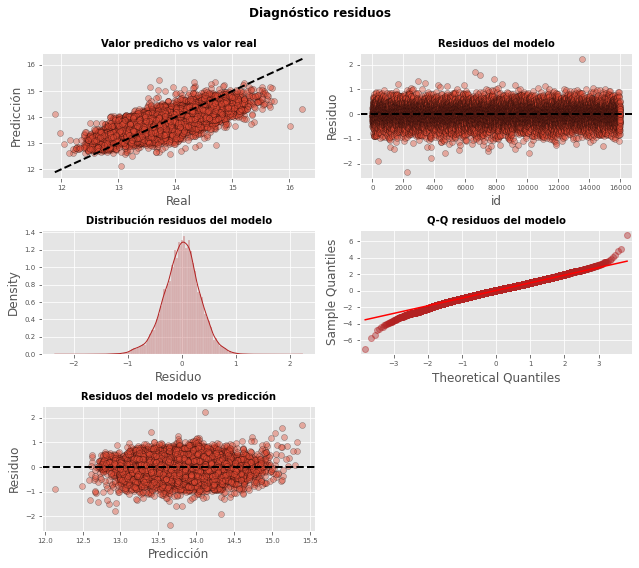

In [26]:
# División de los datos en train y test
# ==============================================================================
X = dataframe_filtered[['Distancia_NEW',"Rooms"]]
y = dataframe_filtered['Price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# Creación del modelo utilizando el modo fórmula (similar a R) este seria ajsute manual 
# ==============================================================================
'''datos_train = pd.DataFrame(
                     np.hstack((X_train, y_train)),
                     columns=['Rooms', 'Bathroom', 'Distance', 'Price']
               )
modelo = smf.ols(formula = 'Price ~ BathAndRooms', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())
'''

# Creación del modelo utilizando matrices como en scikitlearn (ajuste automatico , entrena c el train y depsue lo ajusta aqui esta metiendo solo rooms y disctaia nw en y precio)
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['1%', '99%']
intervalos_ci




# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)#s euita la variable precio y se calcula la variables segun los datos y despues  se mira a difrencia con lso datos reales.
residuos_train   = prediccion_train - y_train

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
const            12.6407 
Distancia_NEW    -0.2812
Rooms             1.2148

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [27]:

#pruebas de normalidad 
import statsmodels.stats.api as sms
import statsmodels as st
import scipy
from scipy import stats as sp
sms.linear_harvey_collier(modelo)

print(dataframe_filtered.describe())


#Ttest_indResult
sp.ttest_ind(prediccion_train,y_train)
pred_val = modelo.fittedvalues.copy()
true_val = dataframe_filtered['Price'].values.copy()
residual = y_train - pred_val
_, pval, __, f_pval = st.stats.diagnostic.het_breuschpagan(residual, X_train[['Distancia_NEW', 'Rooms']])

print(sp.ttest_ind(prediccion_train,y_train))
print(str(pval)+str(f_pval))
#ShapiroResult
shapiro_test = stats.shapiro(residuos_train)
print(shapiro_test)

# Estadítico
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

         Unnamed: 0         Rooms         Price      Distance      Postcode  \
count  19963.000000  19963.000000  19963.000000  19963.000000  19963.000000   
mean   16849.851575      1.724015     13.765878      3.203100   3110.922757   
std     9813.585923      0.274340      0.509603      0.931977    109.906724   
min        1.000000      1.000000     11.350407      0.836660   3000.000000   
25%     8461.000000      1.414214     13.407542      2.529822   3046.000000   
50%    16928.000000      1.732051     13.723395      3.224903   3084.000000   
75%    24644.000000      2.000000     14.104442      3.741657   3150.000000   
max    34856.000000      3.162278     16.231424      6.587868   3978.000000   

           Bathroom           Car      Landsize     Lattitude    Longtitude  \
count  19963.000000  19963.000000  19963.000000  19963.000000  19963.000000   
mean       1.576316      1.694936      5.522624    -37.808971      4.976740   
std        0.668036      0.980068      1.898122    

/home/inma/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:1635: RuntimeWarning: invalid value encountered in sqrt
/home/inma/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
